In [331]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [332]:
df = pd.read_csv("../data/thoi_trang.csv", index_col=0)
# df = pd.read_csv("../data/do_dien_tu.csv", index_col=0)

In [333]:
df.shape

(9764, 16)

In [334]:
df.head()

,Product Name,Price,Brand,Categories,Product Sold,Stock,Rating,5 Start,4 Start,3 Start,2 Start,1 Start,Total Rating,No of Comments,Image and Video,Parent Category
0,Porozi Áo sweater dệt kim tay dài cổ tròn thời...,139000.0,porozi,Thời Trang Nữ/Áo len & Cardigan,931,142230,4.7,290,10,15,4,11,330,166,143,Thời Trang Nữ
1,FREESHIP- Áo len cổ tròn màu xanh đính cúc pho...,152000.0,porozi,Thời Trang Nữ/Áo len & Cardigan,241,17,4.9,56,5,0,0,0,61,45,39,Thời Trang Nữ
2,Áo len cho bố nam trung niên loại 1 đẹp dày dặ...,100000.0,porozi,"Thời Trang Nam/Áo Hoodie, Áo Len & Áo Nỉ/Áo Len",176,280,4.6,37,4,4,0,2,47,25,11,Thời Trang Nam
3,"Áo Len Nam Cổ Tròn Trơn SUKIYA Nhiều Màu, Đủ S...",164250.0,SUKIYA JAPAN,"Thời Trang Nam/Áo Hoodie, Áo Len & Áo Nỉ/Áo Len",7800,83902,4.9,2300,102,41,10,22,2500,1300,1000,Thời Trang Nam
4,Áo khoác cardigan len lửng tay dài nhiều màu,215000.0,SUKIYA JAPAN,Thời Trang Nữ/Áo len & Cardigan,556,11,4.9,135,7,3,0,2,147,86,75,Thời Trang Nữ


In [335]:
df.corr()

,Price,Product Sold,Stock,Rating,5 Start,4 Start,3 Start,2 Start,1 Start,Total Rating,No of Comments,Image and Video
Price,1.000000,-0.017704,-0.000582,0.014100,-0.014722,-0.019982,-0.022387,-0.022085,-0.019559,-0.013532,-0.014239,-0.013170
Product Sold,-0.017704,1.000000,0.007873,-0.007356,0.588397,0.588050,0.562560,0.538007,0.512057,0.776179,0.566017,0.549791
Stock,-0.000582,0.007873,1.000000,0.009141,0.003069,0.006968,0.008231,0.010948,0.009378,0.001991,0.003285,0.002738
Rating,0.014100,-0.007356,0.009141,1.000000,0.102626,0.115858,0.113840,0.106986,0.093749,-0.012108,0.100378,0.094855
5 Start,-0.014722,0.588397,0.003069,0.102626,1.000000,0.910043,0.832206,0.782875,0.720427,0.771266,0.991752,0.985995
4 Start,-0.019982,0.588050,0.006968,0.115858,0.910043,1.000000,0.966263,0.903866,0.836670,0.706998,0.905237,0.875741
3 Start,-0.022387,0.562560,0.008231,0.113840,0.832206,0.966263,1.000000,0.962643,0.908199,0.648901,0.828588,0.795279
2 Start,-0.022085,0.538007,0.010948,0.106986,0.782875,0.903866,0.962643,1.000000,0.959238,0.611104,0.786404,0.758302
1 Start,-0.019559,0.512057,0.009378,0.093749,0.720427,0.836670,0.908199,0.959238,1.000000,0.563869,0.721881,0.693836
Total Rating,-0.013532,0.776179,0.001991,-0.012108,0.771266,0.706998,0.648901,0.611104,0.563869,1.000000,0.765009,0.760002


In [336]:
df_corr = df.copy()
df_corr['Rating'] = df_corr['Total Rating']
df_corr = df_corr.drop(['5 Start','4 Start', '3 Start',	'2 Start',	'1 Start', 'Total Rating'], axis=1)
matrix = df_corr.corr()
matrix = matrix.unstack()
matrix = matrix[abs(matrix) >= 0.7]

In [340]:
df_corr.isnull().sum()

Product Name       0
Price              0
Brand              0
Categories         0
Product Sold       0
Stock              0
Rating             0
No of Comments     0
Image and Video    0
Parent Category    0
dtype: int64

In [339]:
correlation = df_corr.corr()
print(correlation["Rating"].sort_values(ascending=False))

Rating             1.000000
Product Sold       0.776179
No of Comments     0.765009
Image and Video    0.760002
Stock              0.001991
Price             -0.013532
Name: Rating, dtype: float64


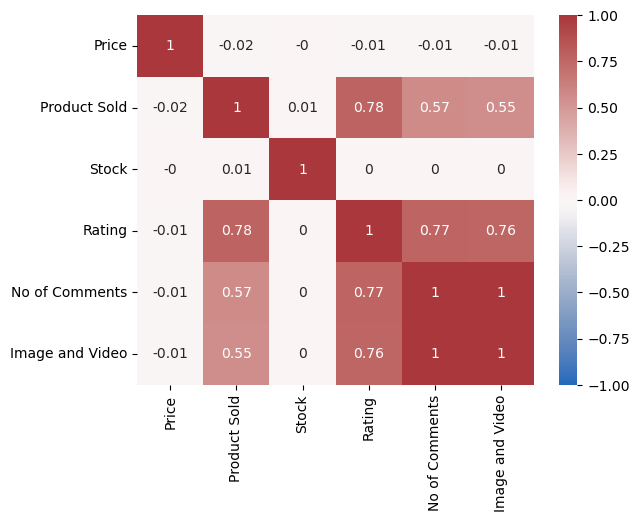

In [338]:

matrix = df_corr.corr().round(2)
# sns.heatmap(matrix, annot=True)
chart = sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()
chart.figure.savefig("../figures/heatmap.jpeg")


In [299]:
import plotly.express as px

# rating = df['Total Rating'].sum()
start5 = df['5 Start'].sum()
start4 = df['4 Start'].sum()
start3 = df['3 Start'].sum()
start2 = df['2 Start'].sum()
start1 = df['1 Start'].sum()

labels = ['5 Start','4 Start','3 Start','2 Start', '1 Start']
values = [start5, start4, start3, start2, start1]

fig = px.pie(df, values=values, names=labels,
             title='Rating', hole=0.5)
fig.show()

In [300]:
figure = px.scatter(data_frame = df, x="Product Sold",
                    y="Total Rating", size="Total Rating", trendline="ols", 
                    title = "Relationship Between Total Rating and Product Sold")
figure.show()

In [301]:
df.head(10)

,Product Name,Price,Brand,Categories,Product Sold,Stock,Rating,5 Start,4 Start,3 Start,2 Start,1 Start,Total Rating,No of Comments,Image and Video,Parent Category
0,Porozi Áo sweater dệt kim tay dài cổ tròn thời...,139000.0,porozi,Thời Trang Nữ/Áo len & Cardigan,931,142230,4.7,290,10,15,4,11,330,166,143,Thời Trang Nữ
1,FREESHIP- Áo len cổ tròn màu xanh đính cúc pho...,152000.0,porozi,Thời Trang Nữ/Áo len & Cardigan,241,17,4.9,56,5,0,0,0,61,45,39,Thời Trang Nữ
2,Áo len cho bố nam trung niên loại 1 đẹp dày dặ...,100000.0,porozi,"Thời Trang Nam/Áo Hoodie, Áo Len & Áo Nỉ/Áo Len",176,280,4.6,37,4,4,0,2,47,25,11,Thời Trang Nam
3,"Áo Len Nam Cổ Tròn Trơn SUKIYA Nhiều Màu, Đủ S...",164250.0,SUKIYA JAPAN,"Thời Trang Nam/Áo Hoodie, Áo Len & Áo Nỉ/Áo Len",7800,83902,4.9,2300,102,41,10,22,2500,1300,1000,Thời Trang Nam
4,Áo khoác cardigan len lửng tay dài nhiều màu,215000.0,SUKIYA JAPAN,Thời Trang Nữ/Áo len & Cardigan,556,11,4.9,135,7,3,0,2,147,86,75,Thời Trang Nữ
5,Áo len oversize form dáng rộng dệt kim dài tay...,165000.0,SUKIYA JAPAN,Thời Trang Nữ/Áo len & Cardigan,716,0,4.9,223,11,8,0,0,242,177,154,Thời Trang Nữ
6,ÁO KHOÁC CARDIGAN LEN NỮ QUẢNG CHÂU HỌA TIẾT H...,169000.0,SUKIYA JAPAN,Thời Trang Nữ/Áo len & Cardigan,21900,142230,4.9,3800,113,47,16,41,4100,1600,1400,Thời Trang Nữ
7,[SẴN HÀNG] Áo len Noel giáng sinh cực nhiều mẫ...,259000.0,SUKIYA JAPAN,Thời Trang Nữ/Áo len & Cardigan,410,421,4.8,68,7,3,1,0,79,51,32,Thời Trang Nữ
8,"Áo len lông thỏ cao cấp siêu mềm mịn , ao len ...",230000.0,SUKIYA JAPAN,Thời Trang Nữ/Áo/Khác,140,690,5.0,39,2,0,0,0,41,24,20,Thời Trang Nữ
9,Áo len nữ màu trắng đen nâu phom xinh thời tra...,205000.0,SUKIYA JAPAN,Thời Trang Nữ/Áo len & Cardigan,402,157,4.9,111,4,1,0,0,116,77,56,Thời Trang Nữ


In [302]:
df["Parent Category"].unique()

array(['Thời Trang Nữ', 'Thời Trang Nam', 'Thời Trang Trẻ Em',
       'Túi Ví Nữ', 'Balo & Túi Ví Nam', 'Phụ Kiện & Trang Sức Nữ',
       'Giày Dép Nam', 'Thể Thao & Du Lịch', 'Sắc Đẹp', 'Đồ Chơi',
       'Giày Dép Nữ', 'Nhà Sách Online', 'Đồng Hồ', 'Thiết Bị Điện Tử'],
      dtype=object)

<h3>Get necessary columns only</h3>

In [303]:
except_list = ["Thể Thao & Du Lịch", "Đồ Chơi", "Nhà Sách Online", "Thiết Bị Điện Tử"]

In [304]:
for exc in except_list:
    df = df.loc[df["Parent Category"] != exc]

<h3>Price</h3>

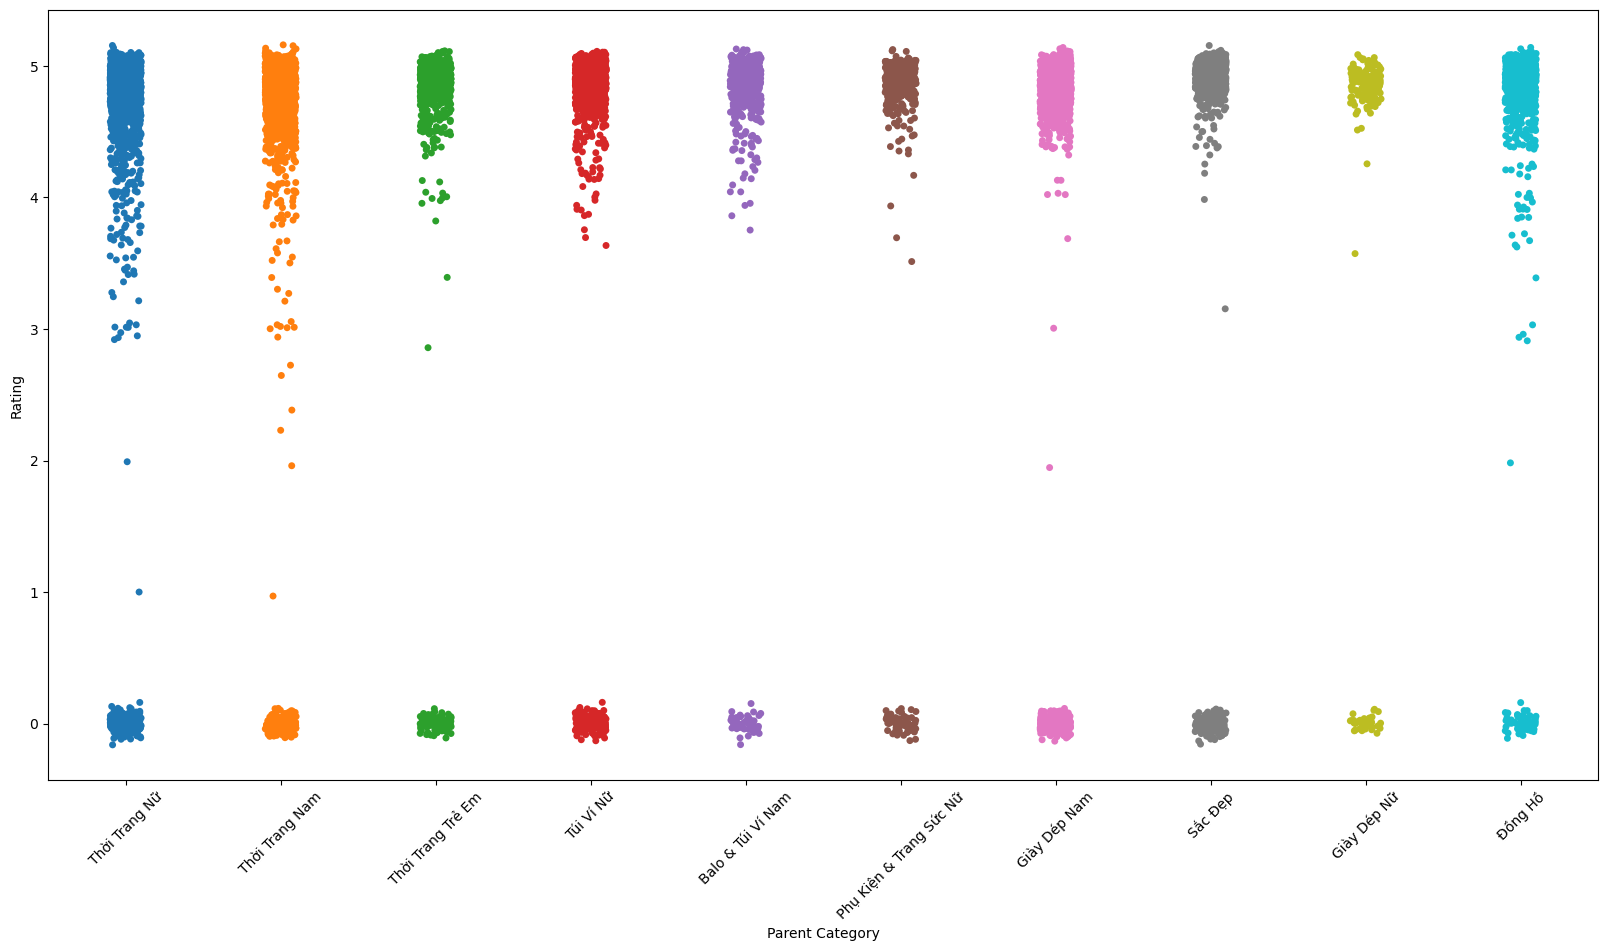

In [305]:
plt.figure(figsize=(20, 10))
df["Rating"] = df["Rating"].apply(lambda x: x + np.random.normal(0, 0.05))  # add jitter in y-axis
chart = sns.stripplot(data=df, x="Parent Category", y="Rating", hue="Parent Category")
plt.xticks(rotation=45)
plt.legend('',frameon=False)
chart.figure.savefig("../figures/Rating.jpeg")

<h3>Product sold</h3>

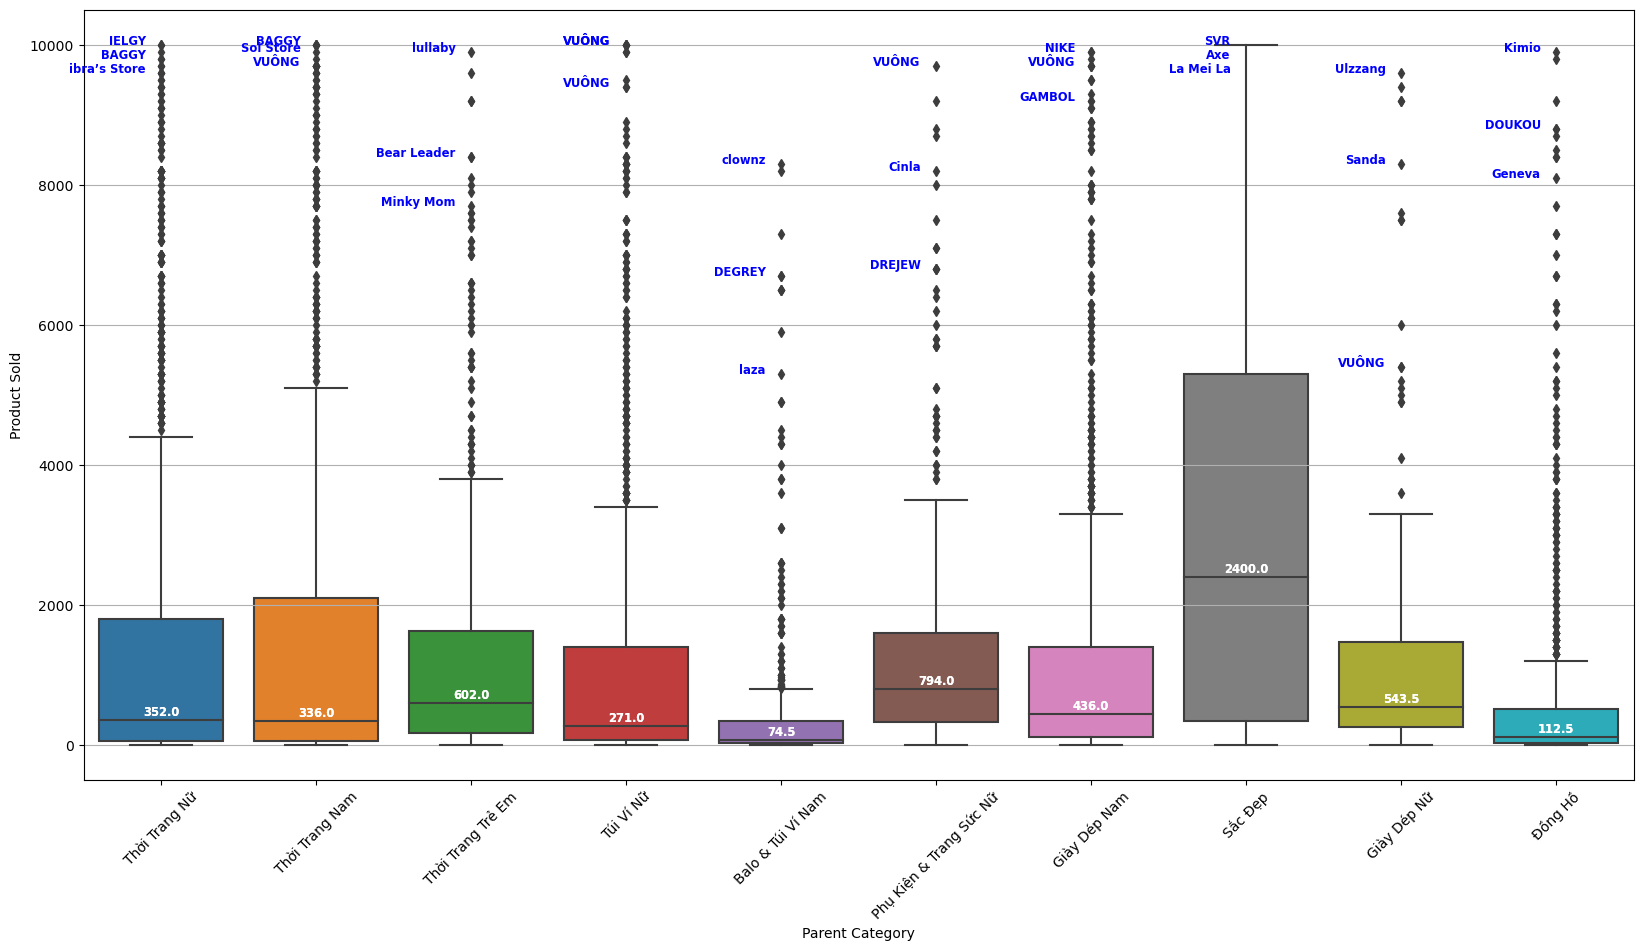

In [306]:
plt.figure(figsize=(20, 10))
ylim = 10000
min_offset = 100

df = df.loc[df["Product Sold"] <= ylim]  # remove outliner
chart = sns.boxplot(data=df, x="Parent Category", y="Product Sold")
medians = df.groupby(["Parent Category"], sort=False)["Product Sold"].median()
offset = (medians * 0.1).mean()

for xtick in chart.get_xticks():
    chart.text(xtick, medians[xtick] + offset, medians[xtick], 
                  horizontalalignment='center',size='small',color='w',weight='semibold')

x_labels = df["Parent Category"].unique()

topk = df.sort_values(["Parent Category", "Product Sold"], ascending=False).groupby("Parent Category").head(10)
for xtick in chart.get_xticks():
    chart.text(xtick, medians[xtick] + offset, medians[xtick], 
               horizontalalignment='center',size='small',color='w',weight='semibold')
    cat_df = topk.loc[topk["Parent Category"] == x_labels[xtick]].reset_index(drop=True)
    for i, row in cat_df.iterrows():
        if i not in [0, 4, 9]:
            continue
        chart.text(xtick - 0.1, row["Product Sold"], row["Brand"],
                   horizontalalignment='right',size='small',color='b',weight='semibold')

plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()
chart.figure.savefig("../figures/ProductSold.jpeg")

<h3>Price</h3>

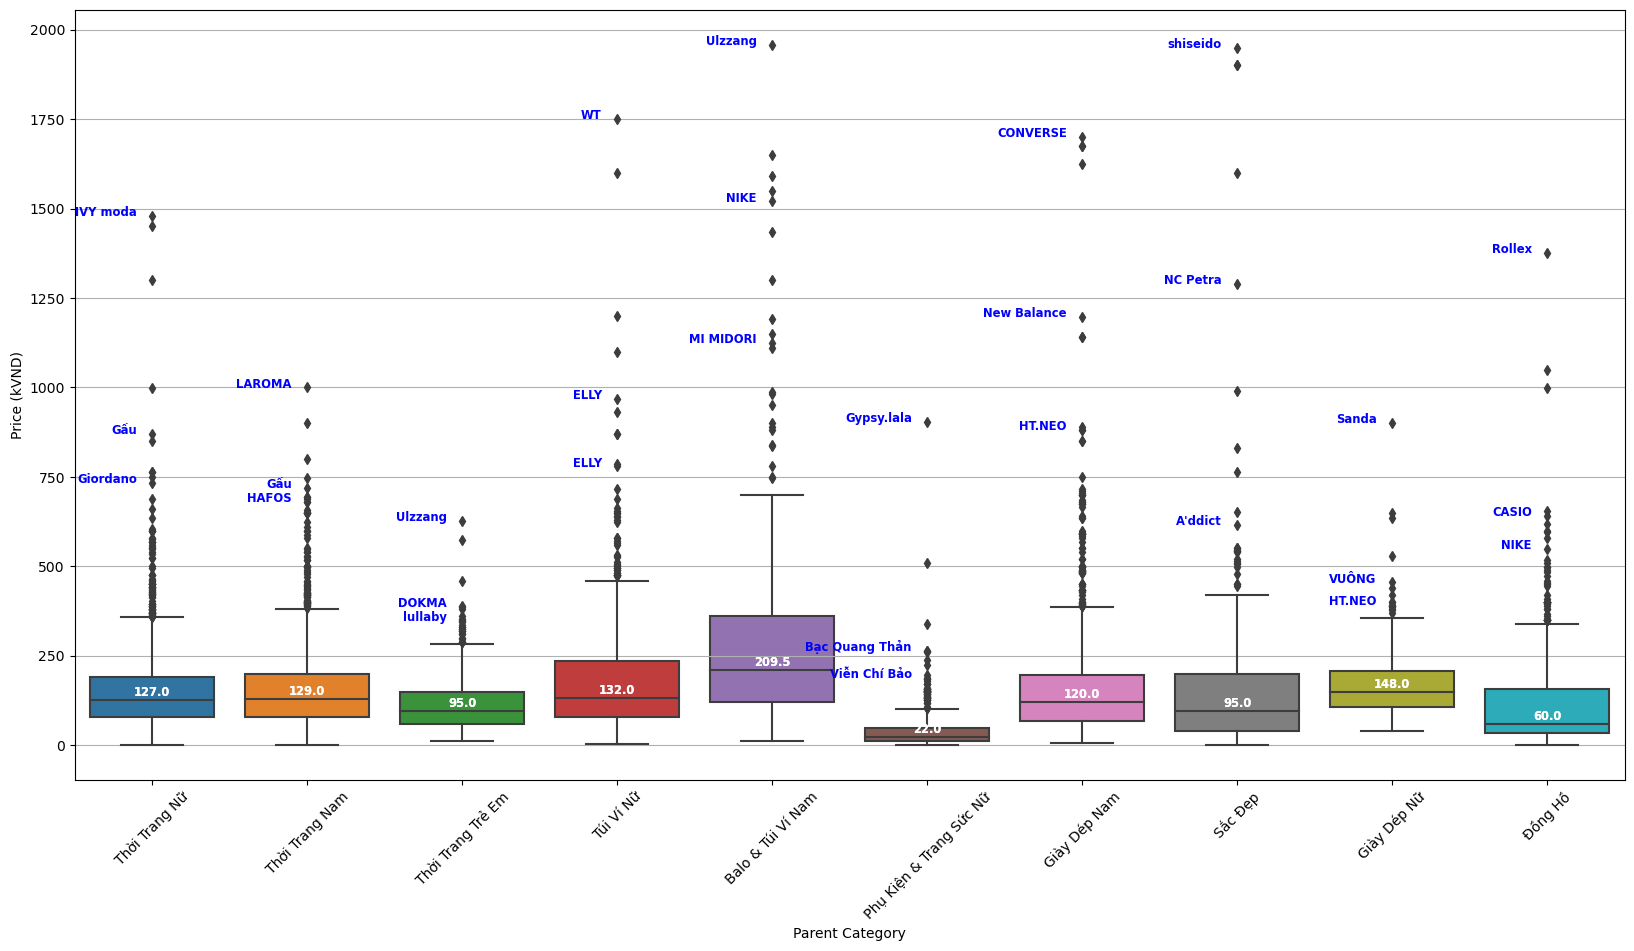

In [307]:
plt.figure(figsize=(20, 10))
df["Price"] = df["Price"] / 1e3  # unit k-vnd
df = df.loc[df["Price"] <= 2e3]  # <= 2mil vnd only
chart = sns.boxplot(data=df, x="Parent Category", y="Price")
medians = df.groupby(["Parent Category"], sort=False)["Price"].median()
offset = (medians * 0.1).mean()

for xtick in chart.get_xticks():
    chart.text(xtick, medians[xtick] + offset, medians[xtick], 
                  horizontalalignment='center',size='small',color='w',weight='semibold')

x_labels = df["Parent Category"].unique()
topk = df.sort_values(["Parent Category", "Price"], ascending=False).groupby("Parent Category").head(10)
for xtick in chart.get_xticks():
    chart.text(xtick, medians[xtick] + offset, medians[xtick], 
               horizontalalignment='center',size='small',color='w',weight='semibold')
    cat_df = topk.loc[topk["Parent Category"] == x_labels[xtick]].reset_index(drop=True)
    for i, row in cat_df.iterrows():
        if i not in [0, 4, 9]:
            continue
        chart.text(xtick - 0.1, row["Price"], row["Brand"],
                   horizontalalignment='right',size='small',color='b',weight='semibold')

chart.set(ylabel="Price (kVND)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()
chart.figure.savefig("../figures/Price.jpeg")

## Modeling

In [308]:
X = df[["No of Comments", "Image and Video"]]
y = df[["Rating"]]
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
# reg = PassiveAggressiveRegressor()
reg = LinearRegression()
cv_score = cross_val_score(reg, X, y, cv=5, scoring='neg_root_mean_squared_error')
cv_score.mean()

-2.054815697415834

In [309]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
x = np.array(df[['Total Rating', 'No of Comments', 'Image and Video']])
y = np.array(df["Product Sold"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [310]:
model = PassiveAggressiveRegressor()
for i in range(1,100):
    model.fit(xtrain, ytrain)
    score = model.score(xtest, ytest)
    if score > 0.66:
        print(score)
        break
# model.fit(xtrain, ytrain)
# model.score(xtest, ytest)

0.7836979382747473


In [311]:
features = np.array([[282.0, 233.0, 124.0]])
model.predict(features)

array([1152.5742389])

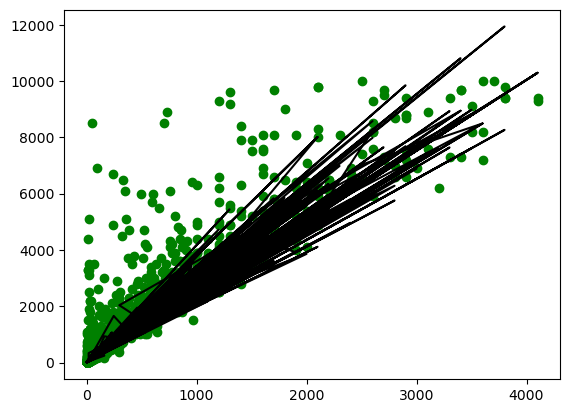

In [312]:
y_pred = model.predict(xtest)
plt.scatter(xtest[:,0], ytest, color='g') 
plt.plot(xtest[:,0], y_pred, color='k') 
plt.show()

In [313]:
from sklearn.linear_model import LinearRegression 

regressor = LinearRegression() 
for i in range(1,100):
    regressor.fit(xtrain, ytrain)
    score = regressor.score(xtest, ytest)
    if score > 0.6:
        print(score)
        break

In [314]:
features = np.array([[282.0, 233.0, 124.0]])
regressor.predict(features)

array([2351.0619883])

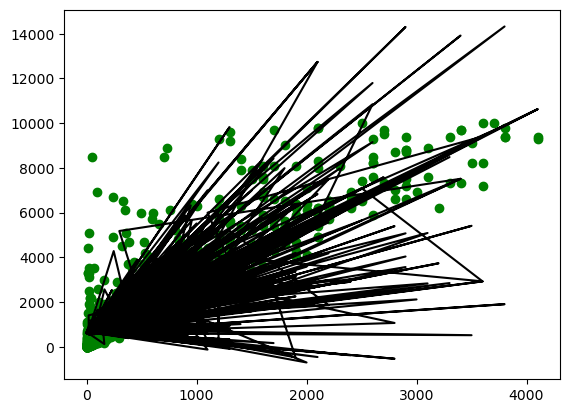

In [315]:
y_pred = regressor.predict(xtest)
plt.scatter(xtest[:,0], ytest, color='g') 
plt.plot(xtest[:,0], y_pred, color='k')
plt.show()

In [316]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(ytest, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(ytest, y_pred))

Coefficients: 
 [ 2.50993691  5.24129254 -6.30050837]
Mean squared error: 1840166.94
Coefficient of determination: 0.55


In [317]:
from sklearn.model_selection import cross_val_score
x = cross_val_score(model, xtest, ytest, cv=5, scoring='neg_mean_squared_error')
x.mean()

-3772246.2801559204

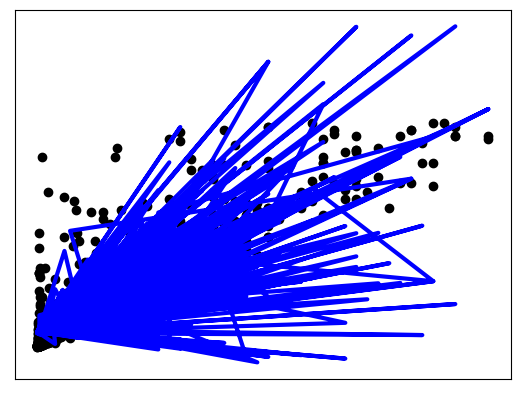

In [318]:
plt.scatter(xtest[:,0], ytest, color="black")
plt.plot(xtest[:,0], y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()